In [1]:
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np
import scipy as spy
import tensorflow as tf
# Suporte a versão legado do tensorflow
tf.compat.v1.disable_eager_execution()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import binary_accuracy
import math
import random
import os

# Redes Neurais Artificiais 
# Table of Contents

[1. Introdução as redes neurais artificiais](#heading--1)

  * [1.1. Introdução as RNAs](#heading--1-1)
  * [1.2. Perceptrons](#heading--1-2)
  * [1.3. Representação matemática](#heading--1-3)
  * [1.4. Funções de ativação](#heading--1-4)
  * [1.5. Arquitetura de rede](#heading--1-5)
  * [1.6. Exemplo para o problema de XOR](#heading--1-6)

[2. Multilayer Perceptrons, redes de multiplas camadas](#heading--2)

  * [2.1. Back-Propagation Algorithm](#heading--2-1)

----
### Introdução as RNAs
<div style="text-align: justify"> A utilização de redes neurais artificiais (RNAs) vem sendo comumente utilizada em diferentes setores de tecnologia, onde algumas caracteristicas como a não linearidade, adaptabilidade e a sua capacidade de implementação em hardware o tornam um grande potencial para ser inerente e tolerânte a falhas. Este notebook trata-se de introduzir o contéudo sobre RNAs contendo alguns algoritmos de aprendizado de máquina que podem implementar uma rede neural artificial MLP. </div>

### Perceptrons 
<div style="text-align: justify"> As RNAs são inspiradas na analogia neurobiológica do cérebro, que é a prova viva de que o processamento paralelo tolerante a falhas não é apenas fisicamente possível, mas também rápido e poderoso, trazendo essa analogia para os algoritmos de aprendizado de máquina temos os neurônios (perceptrons) que é uma unidade de processamento de informações fundamental para a operação de uma rede neural, que formam a base para o projeto de uma grande família de redes neurais artificiais, a função do perceptron é funcionar como um classificador linear (binário). Além disso, é usado na aprendizagem supervisionada e pode ser usado para classificar os dados de entrada fornecidos.</div>
<br/><center>Figura 1 - Modelo não linear de um neurônio, rotulado k</center><br/>

<br/><img src="https://i.postimg.cc/xC6GLgKG/arquitetura-perceptron.png" style="display:block; margin:auto"><br/>

Alguns elementos importantes que podemos observar são:

**- Sinapses**: Conjunto de sinapses, ou links de conexão, onde cada um e caracterizado com um peso independente, onde o sinal de entrada ![equation](https://latex.codecogs.com/gif.latex?x_j) da sinapse ![equation](https://latex.codecogs.com/gif.latex?j) conectado ao neurônio ![equation](https://latex.codecogs.com/gif.latex?k) e multiplicado pelo peso sináptico ![equation](https://latex.codecogs.com/gif.latex?w_%7Bkj%7D).
<br/>**- Adder**: Também existe a presença de um somatório que ira somar os sinais de entrada, ponderados pelas respectivas intensidades sinápticas do neurônio, tais operações constituem em uma combinação linear. <br/>
**- Activation function**: Ao final também temos a função de ativação que serve para limitar a amplitude da saída de um neurônio. A função de ativação é conhecida como função de esmagamento, na medida em que comprime (limita) a faixa de amplitue permitida do sinal de saída para algum valor finito. Normalmente, a faixa de amplitude normalizada da saída de um neurônio é escrita como o intervalo de unidade fechada ![equation](https://latex.codecogs.com/gif.latex?%5B0%2C1%5D) ou, alternativamente, ![equation](https://latex.codecogs.com/gif.latex?%5B-1%2C1%5D).

Além desses três itens podemos perceber a existência de um fator externo chamado de tendência (Bias) denotado por ![equation](https://latex.codecogs.com/gif.latex?b_k) ele tem como objetivo aumentar ou diminuir a entrada líquida da função de ativação, dependendo se ela e positiva ou negativa, respectivamente.

### Representação Matemática
Podemos descrever o neurônio k representado na Fig. 1 escrevendo as sequintes equações:

<br/><center> <font size="4"> $$u_k=\sum_{j=1}^{m}w_{kj}x_j$$ </font></center><br/>
<br/><center> <font size="4"> $$y_k=\varphi(u_k + b_k)$$ </font></center><br/>

Onde ![equation](https://latex.codecogs.com/gif.latex?x_1%2C%20x_2%2C%20...%20x_m) são sinais de entrada; ![equation](https://latex.codecogs.com/gif.latex?w_1%2C%20w_2%2C%20...%20w_%7Bkm%7D) são os respectivos pesos sinápticos do neurônio k; ![equation](https://latex.codecogs.com/gif.latex?u_k) é a saída do combinador linear devido aos sinais de entrada; ![equation](https://latex.codecogs.com/gif.latex?b_k) como sendo a têndencia, tendo como efeito a transformação afim à saída ![equation](https://latex.codecogs.com/gif.latex?u_k) do combinador linear; ![equation](https://latex.codecogs.com/gif.latex?%5Cvarphi%28%5Ccdot%29) representando a função de ativação e finalmente ![equation](https://latex.codecogs.com/gif.latex?y_k) sendo o resultado de saída do nosso neurônio.

<br/><center> <font size="4">$$v_k=u_k + b_k$$ </font></center><br/>

O ![equation](https://latex.codecogs.com/gif.latex?b_k) é um parâmetro externo do neurônio ![equation](https://latex.codecogs.com/gif.latex?k). de forma equivalente, podemos formular a combinação das equações da seguinte forma:

<br/><center> <font size="4">$$v_k=\sum_{j=0}^{m}w_{kj}x_j$$ </font></center><br/>

### Funções de ativação

As funções de ativação denotada por ![equation](https://latex.codecogs.com/gif.latex?%5Cvarphi%28v%29) podem definir a saída de um neurônio em termos do campo local induzido ![equation](https://latex.codecogs.com/gif.latex?v) podemos encontrar diversos tipos de funções de ativação, abaixo encontramos as mais comuns

**Função de limite (Heaviside)**: 
<br/><center> <font size="4"> $$\varphi(v) = \begin{cases} 1, &{v \geq 0} \\ 0, &{v < 0} \end{cases}$$ </font></center><br/>

Esta forma de função de limite é comumente referida como função de Heaviside.Correspondentemente, a saída do neurônio k que pode ser expressa como

<br/><center> <font size="4"> $$y_k = \begin{cases} 1, &{v_k \geq 0} \\ 0, &{v_k < 0} \end{cases}$$ </font></center><br/>

Onde ![equation](https://latex.codecogs.com/gif.latex?v_k) é o campo local induzido do neurônio; isso é,

<br/><center> <font size="4">$$v_k=\sum_{j=1}^{m}w_{kj}x_j + b_k$$ </font></center><br/>


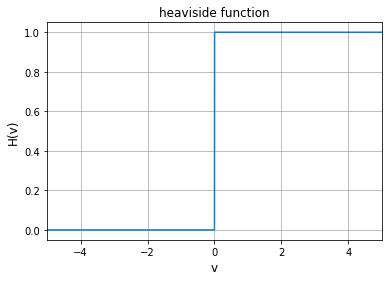

In [2]:
# Heaviside function example
def heaviside(v_signal):
    """
    Função de ativação Heaviside 
    :param v_signal : campo local induzido do neurônio.
    
    :return activFunction: retorna valor 0 ou 1 dependendo do campo local induzido.
    """
    activFunction = np.heaviside(v_signal, 1)
    return activFunction
    
    # Forma alternativa
    # return 1 * (v_signal >= 0) - 1 * (v_signal < 0)

v = np.linspace(-5, 5, 10000)

#plota a função Heaviside
plt.title('heaviside function')
plt.xlabel('v', fontsize=12)
plt.ylabel('H(v)', fontsize=12)
plt.xlim(-5, 5)
plt.plot(v, heaviside(v))
plt.grid()


Na computação neural, esse neurônio é conhecido como o Modelo McCulloch – Pitts, em reconhecimento ao trabalho pioneiro realizado por McCulloch e Pitts (1943). Neste modelo, a saída de um neurônio assume o valor de 1 se o campo local induzido desse neurônio for não negativo e 0, caso contrário. Esta declaração descreve opropriedade tudo ou nada do modelo McCulloch – Pitts.

**Função sgmóid**: A função sigmóide, cujo gráfico é em forma de "S", é de longe a forma mais comum de função de ativação usada na construção de redes neurais. É definido como uma função estritamente crescente que exibe um equilíbrio elegante entre o comportamento linear e não linear. Como exemplo de função linear temos a seguinte função

<br/><center> <font size="4"> $$\varphi(v) = \frac{1}{1 + exp(-av)}$$ </font></center><br/>

<br/>Onde **a** é o parâmetro de inclinação da função sigmoid. Conforme o parâmetro de inclinação se aproxima do infinito, a função sigmóide torna-se simplesmente uma função de limite.<br/> 

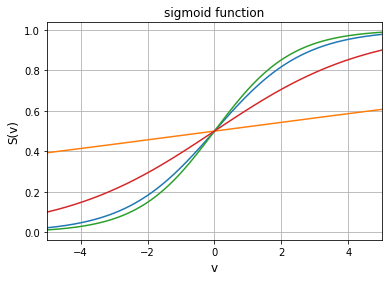

In [3]:
def sigmoid(v_signal, a):
  """
  Função de ativação sigmoid 
  :param v_signal : campo local induzido do neurônio.
  :param a : parâmetro de inclinação da função sigmoid.

  :return : retorna uma faixa contínua de valores 0 e 1.
  """
  return 1 / (1 + np.exp(-a * v_signal))

def generator():
  """
  Função que gera inteiros aleatórios.
  """
  return random.random()

v = np.linspace(-5, 5, 10000)

#plota as curvas da função sigmóide
plt.title('sigmoid function')
plt.xlabel('v', fontsize=12)
plt.ylabel('S(v)', fontsize=12)
plt.xlim(-5, 5)
plt.plot(v, sigmoid(v, generator()))
plt.plot(v, sigmoid(v, generator()))
plt.plot(v, sigmoid(v, generator()))
plt.plot(v, sigmoid(v, generator()))
plt.grid()


Enquanto uma função de limite assume o valor de 0 ou 1, uma função sigmoid assume uma faixa contínua de valores de 0 a 1. Além disso podemos observar também que o a função sigmoid é diferenciável, enquanto a função de limite não é, onde a caracteristica de ser diferenciável e bastante importante na teoria das redes neurais. 

Outra função bastante útil e a **função signum**, onde algumas vezes e necessário ter a função de ativação na faixa de -1 a 1, caso em que a função de ativação é uma função ímpar do campo local induzido, sendo essa função definida como

<br/><center> <font size="4"> $$\varphi(v) = \begin{cases} 1, &{v > 0} \\ 0, &{v = 0} \\ -1, &{v < 0} \end{cases}$$ </font></center><br/>

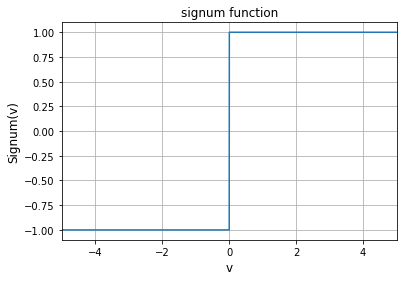

In [4]:
def signum(v_signal):
    """
    Função de ativação signum
    :param v_signal : campo local induzido do neurônio.

    :return activFunction: retorna valores na faixa de -1 e 1.
    """
    activFunction = np.sign(v_signal)
    return activFunction
    

v = np.linspace(-5, 5, 10000)

#plota a curva da função signum
plt.title('signum function')
plt.xlabel('v', fontsize=12)
plt.ylabel('Signum(v)', fontsize=12)
plt.xlim(-5, 5)
plt.plot(v, signum(v))
plt.grid()


Para a forma correspondente de uma função sigmóide, podemos usar o função tangente hiperbólica, definido por

<br/><center> <font size="4"> $$\varphi(v) = tanh(v)$$ </font></center><br/>

Permitir que uma função de ativação do tipo sigmóide assuma valores negativos pode render benefícios práticos satisfatórios. Abaixo temos o plot das funções de ativação mais utilizadas pelos perceptrons.

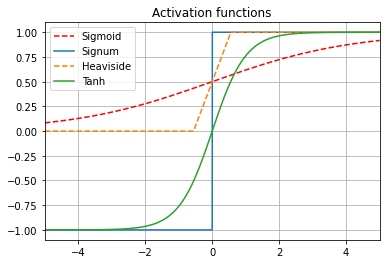

In [5]:
#plota as funções de ativação ja vistas
plt.title('Activation functions')
plt.xlim(-5, 5)

# gera um intervalo
t = np.linspace(-5, 5, 10)

#plot das funções de ativação
plt.plot(v, sigmoid(v, generator()), 'r--', label='Sigmoid')
plt.plot(v, signum(v), label = 'Signum')
plt.plot(t, heaviside(t), '--', label='Heaviside')
plt.plot(v, np.tanh(v), label='Tanh')
plt.legend()
plt.grid()


### Arquitetura de rede

A maneira como os neurônios de uma rede neural são estruturados está intimamente ligada ao algoritmo de aprendizagem usado para treinar a rede. Em geral temos três classes fundamentalmente diferentes de
arquiteturas de rede.

- **Redes Feedforward de Camada Única** : Em uma rede neural os neurônios são organizados na forma de camadas, na forma mais simples de uma rede em camadas, temos uma camada de entrada de nós de origem que se projetam diretamente em um camada de saída de neurônios (nós de computação), mas não viceversa. Em outras palavras significa que não há loops na rede, as informações sempre são alimentadas para a frente, nunca são enviadas de volta e não formam um ciclo. <br/><center>Redes Feedforward de Camada Única</center><br/>

<br/><img src="https://i.postimg.cc/dt0dRX31/1.png" style="display:block; margin:auto"><br/>

- **Redes Multilayer Feedforward** : A segunda classe de uma rede neural feedforward se distingue pela presença de um ou mais camadas escondidas, cujos nós de computação são chamados de forma correspondente
neurônios escondidos ou unidades escondidas; o termo “oculto” refere-se ao fato de que essa parte da rede neural não é vista diretamente da entrada ou da saída da rede. A função dos neurônios ocultos é intervir entre a entrada externa e a saída da rede de alguma maneira útil. Em muitas aplicações, as unidades dessas redes aplicam uma função sigmoid como uma função de ativação. 

<center>Redes Multilayer Feedforward</center>

<br/><img src="https://i.postimg.cc/tgFVCGSr/2.png" style="display:block; margin:auto"><br/>

- **Redes Recorrentes** : Uma rede neural recorrente distingue-se de uma rede neural feedforward por ter pelo menos um ciclo, onde a rede recorrente pode consistir em uma única camada de neurônios com cada neurônio alimentando seu sinal de saída de volta para as entradas de todos os outros neurônios, em consequência esse tipo de rede se torna muito úteis e poderosas, os loops se comportam na forma de feedback que se refere a uma situação em que a saída de um neurônio é realimentada em sua própria entrada. A presença de loops de feedback, seja na estrutura recorrente tem um impacto profundo na capacidade de aprendizagem da rede e em seu desempenho. Além disso, os loops de feedback envolvem o uso de ramos específicos compostos de elementos de atraso de tempo unitário que resulta em um comportamento dinâmico não linear, assumindo que a rede neural contém unidades não lineares, o atraso de tempo unitário pode ser denotado como: $$z^{-1}$$ 

<center>Redes Recorrentes</center>

<img src="https://i.postimg.cc/YSxYzw6v/3.png" style="display:block; margin:auto">

### Exemplo para o problema de XOR

Primeiramente precisamos saber o que e a função XOR, nada mais é que uma operação lógica exclusiva ou (disjunção exclusiva) que produz verdadeiro somente quando as entradas diferem, a operação pode ser representada como:

| Primeira entrada | Segunda entrada | Saída da função |
|:---: |:---: |:---: |
| X0 | X1 | Y = X0 xor X1 |
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |

Minsky e Papert analisaram matematicamente o Perceptron e demostraram que redes de uma camada não são capazes de solucionar problemas que não sejam linearmente separáveis. Como não acreditavam na possibilidade de se construir um método de treinamento para redes com mais de uma camada, eles concluíram que as redes neurais seriam sempre suscetíveis a essa limitação. Nesse ponto e intropduzido as redes multilayer perceptron (MLP) ou Perceptron multicamadas, como vimos anteriormente podemos utilizar diversas arquiteturas de redes para diferentes problemas, assim iremos introduzir o primeiro algoritmo de aprendizagem para uma rede MLP conhecido como **gradiente descendente**.

### Gradiente Descendente e TensorFlow

<div style="text-align: justify">Antes de falarmos sobre o gradiente descendente é válido mencionar que para a implementação desta rede neural iremos utilizar o tensorflow, uma biblioteca de aprendizado de máquina de código aberto projetada pelo Google para atender às necessidades de sistemas capazes de construir e treinar redes neurais. O objeto central do TensorFlow é um gráfico de fluxo de dados que representa os cálculos. Os vértices do gráfico representam operações e as bordas representam tensores (matrizes multidimensionais que são a base do TensorFlow). O gráfico de fluxo de dados como um todo é uma descrição completa dos cálculos que são implementados na sessão e executados em dispositivos de CPU ou GPU.</div>

Sabendo que iremos utilizar o TensorFlow iremos revisar alguns conceitos sobre as operações em matrizes, que são necessárias para construir uma rede neural no TensorFlow.

**Multiplicação**: Definindo as matrizes *A* e *B*, onde *A* tem tamanho *l* x *m* e a matriz *B* com tamanho *m* x *n* onde a matriz resultante *C* da multiplicação tera um tamanho de *l* x *m*. 

*Ax = b* , onde *A* é uma matriz, *x* e *b* são vetores. O número de colunas em *A* deve ser igual ao número de elementos nos vetores *x* e *b* .

$$A = \begin{pmatrix} a_{11} & a_{12} & \cdots & a_{1m} \\ a_{21} & a_{2,2} & \cdots & a_{2m} \\ \vdots  & \vdots  & \ddots & \vdots  \\ a_{l1} & a_{l2} & \cdots & a_{lm} \end{pmatrix}$$

<br/>

$$B = \begin{pmatrix} b_{11} & a_{12} & \cdots & b_{1,n} \\ b_{21} & b_{2,2} & \cdots & b_{2n} \\ \vdots  & \vdots  & \ddots & \vdots  \\ b_{m1} & b_{m2} & \cdots & b_{mn} \end{pmatrix}$$

<br/>

$$C = \begin{pmatrix} c_{11} & c_{12} & \cdots & c_{1n} \\ c_{21} & c_{22} & \cdots & c_{2n} \\ \vdots  & \vdots  & \ddots & \vdots  \\ c_{l1} & c_{l2} & \cdots & c_{ln} \end{pmatrix}$$

Então obeteremos.

$$c_{ij} = \sum_{r=1}^{m}a_{ir}b_{rj} (i = 1,2,...l; j = 1,2...n)$$

<br/> O algoritmo de multiplicação clássico terá complexibilidade igual a O(n3) <br/>

<div style="text-align: justify">Descrevendo brevemente o gradiente descendente é um dos principais e importantes métodos de treinamento. Consiste em encontrar o gradiente, ou a descida mais rápida ao longo da superfície da função e escolher o próximo ponto de solução. Uma descida gradativa iterativa encontra o valor dos coeficientes para os parâmetros da rede neural para resolver um problema específico. O gradiente descendente é um algoritmo de otimização iterativa para encontrar o mínimo de uma função. Para encontrar o mínimo de uma função usando a descida do gradiente, podemos dar passos proporcionais ao negativo do gradiente da função a partir do ponto atual.</div>

Para treinar a rede neural iremos construir uma **função de erro**. A função de erro é calculada como a diferença entre o vetor de saída da rede neural com certos pesos e o vetor de saída de treinamento para as entradas de treinamento fornecidas.
Se alterarmos os pesos na próxima etapa dos métodos de gradiente descendente, minimizaremos a diferença entre a saída nos neurônios e o conjunto de treinamento do vetor. Como resultado, teremos os valores necessários de pesos e vieses na rede neural e os valores de saída nos neurônios serão os mesmos do vetor de treinamento.

para saber mais sobre o algoritmo de gradiente descendente acesse: https://en.wikipedia.org/wiki/Gradient_descent

Para exemplificar iremos implementar a descida do gradiente para resolver uma equação com uma função quadrática.

$$y = 5x^2$$ 

In [6]:
# Criação dos marcadores x e y.
x = tf.compat.v1.placeholder(tf.float32)
y = tf.compat.v1.placeholder(tf.float32)

# Definindo a equação desejada y = b * x * x
b = tf.Variable([0.0], name = "b")
yequation = tf.multiply(tf.multiply(x, x), b)

# Definindo função de erro.
erro = tf.square(y - yequation)

# Otimizador de Gradiente Descendente.
# Taxa de aprendizem do tensorflow, learning_rate = 1.0.

train = tf.compat.v1.train.GradientDescentOptimizer(1.0).minimize(erro)

# Criando uma sessão e executando o modelo.
model = tf.compat.v1.global_variables_initializer()

with tf.compat.v1.Session() as session:
    session.run(model)
    # Utilizando 50 iterações, quanto maior o número de iterações melhor será a aproximação do resultado.
    for i in range(65):
        
        x_value = np.random.rand()

        # Assumindo que b = 5, assim o valor a ser encontrado pelo gradiente descendente 
        # deve ser igual ou aproximadamente 5.

        y_value = 5.0 * x_value * x_value
        session.run(train, feed_dict={x: x_value, y: y_value})
    
    b_value = session.run(b)
    print("Modelo previsto: b = ", b_value)


Modelo previsto: b =  [5.]


### Construindo a Rede Neural

Para a resolução do problema de XOR poderemos implementar uma rede MLP e treiná-la utilizando o gradiente decendente ou outro otimizador de sua preferência como o Adam, e como função de ativação utilizaremos a função sigmoid. Sequindo a seguinte estrutura.

<br/><img src="https://i.postimg.cc/jqNN5Fkv/network.png" style="display:block; margin:auto"><br/>

Train on 4 samples
Epoch 1/100
4/4 [==============================] - 0s 40ms/sample - loss: 0.2522 - binary_accuracy: 0.5000
Epoch 2/100
4/4 [==============================] - 0s 495us/sample - loss: 0.2521 - binary_accuracy: 0.5000
Epoch 3/100
4/4 [==============================] - 0s 249us/sample - loss: 0.2520 - binary_accuracy: 0.5000
Epoch 4/100
4/4 [==============================] - 0s 249us/sample - loss: 0.2519 - binary_accuracy: 0.5000
Epoch 5/100
4/4 [==============================] - 0s 496us/sample - loss: 0.2518 - binary_accuracy: 0.5000
Epoch 6/100
4/4 [==============================] - 0s 256us/sample - loss: 0.2518 - binary_accuracy: 0.5000
Epoch 7/100
4/4 [==============================] - 0s 244us/sample - loss: 0.2517 - binary_accuracy: 0.5000
Epoch 8/100
4/4 [==============================] - 0s 249us/sample - loss: 0.2516 - binary_accuracy: 0.5000
Epoch 9/100
4/4 [==============================] - 0s 249us/sample - loss: 0.2516 - binary_accuracy: 0.5000
Epoch 10/1

C:\Users\Silas João\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


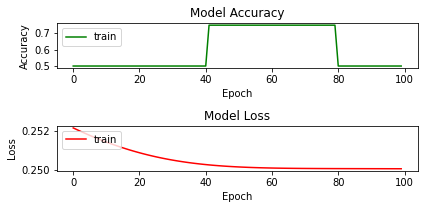

In [7]:
# Simples implementação de uma rede neural MLP, utilizando o ecossistema do Tensorflow e keras
# o motivo pelo qual podemos optar pela sua utilização e devido o uso em conjunto do keras ao numpy
# que se utiliza internamente de matrizes numpy como entradas.

# Criando o conjunto de dados com os quatro diferentes estados da porta XOR.
data = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")

# Quatro possiveis respostas da função XOR.
target_data = np.array([[0], [1], [1], [0]], "float32")

# Criação do modelo. O Keras oferece duas APIs diferentes para construir um modelo: uma funcional e uma sequencial 
# Nesta demostração estamos usando a API sequencial.
model = Sequential()

# Adição de uma camada ao modelo com 60 neurônios ocultos, input_dim = 2 como sendo o comprimento de entrada
# também se utilizando da função de ativação sigmoid.
model.add(Dense(60, input_dim = 2, activation = 'sigmoid'))
model.add(Dense(1, activation='sigmoid'))

# Configuração do modelo de aprendizagem:
# Função de perda: mean_squared_error.
# Otimizador: Adam, com taxa de aprendizado de 0.01.
otimizador = tf.keras.optimizers.Adam(learning_rate = 0.0001)

# Metrics : binary_accuracy, fornece a precissão das previsões, calculando a média dos quadrados dos erros entre rótulos e previsões.
model.compile(loss = 'mean_squared_error', optimizer = otimizador, metrics=['binary_accuracy'])

# Definindo a quantidade de iterações como 100, com saídas fornecendo apenas um valor de resposta
#(a função fit se utiliza do algoritmo de retropropagação que veremos mais a frente).
history = model.fit(data, target_data, nb_epoch=100, verbose=1)

# Predição do modelo
model.predict(data).round()

# Exibe as chaves que foram coletadas no treinamento, dados de precissão e perda.
#history.history.keys()

# Imprime um resumo da string da rede, assim como suas caracteristicas.
model.summary()

# Conjunto dos dados de perda.
# print(history.history['loss'])
# Conjunto dos dados de precissão.
# print(history.history['binary_accuracy'])

# Podemos perceper agora o desempenho da rede através das métricas que foram geradas na saída.
# Vemos que se alterarmos o otimizador para o adam que se refere a outro método de aprendizagem,
# poderemos obter resultados melhores com até 100% de precisão antes das últimas iterações. Além
# de poder testar configurações e arquiteturas diferentes para a rede neral, com isso resolvemos 
# o problema de XOR implementando uma simples rede neural MLP.

# Realizando o plot das métricas obtidas podemos entender melhor como a rede aprende ao longo do tempo.

grafico1 = plt.subplot(311)
plt.plot(history.history['binary_accuracy'], label = "train", color = 'green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc = 2)
plt.title('Model Accuracy')

grafico2 = plt.subplot(312, sharex = grafico1)
plt.plot(history.history['loss'], label = "train", color = 'red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc = 2)
plt.title('Model Loss')

plt.tight_layout()


### Multilayer Perceptrons, redes de multiplas camadas

Vimos até então que o perceptron de Rosenblatt, que é basicamente uma rede neural de camada única. Nele, mostramos que essa rede é limitada à classificação de padrões linearmente separáveis, onde muitas vezes não e possivel resolver problemas mais complexos que não podem ser linearmente separáveis mostrando como exemplo o problema de XOR e a primeira implementação de uma rede MLP. Para superar as limitações práticas do perceptron devemos olhar para uma estrutura de rede neural conhecida como perceptron multicamadas, os pontos a seguir destacam as caracteristicas básicas dos perceptrons multicamadas:

- O modelo de cada neurônio na rede inclui uma função de ativação não linear que é diferenciável.
- A rede contém uma ou mais camadas que estão ocultas tanto da entrada quanto nós de saída.
- A rede exibe um alto grau de conectividade, cuja extensão é determinada extraído por pesos sinápticos da rede.

Essas mesmas características, no entanto, também são responsáveis pelas deficiências de nosso conhecimento sobre o comportamento da rede. Primeiro, a presença de um formulário distribuído da não linearidade e a alta conectividade da rede tornam a análise teórica de um perceptron multicamadas difícil de realizar. Em segundo lugar, o uso de neurônios ocultos torna o processo de aprendizagem mais difícil de visualizar. Em um sentido implícito, o processo de aprendizagem deve decidir quais recursos do padrão de entrada devem ser representados pelo neurônios. Visando essas dificuldades existe um método popular para o treinamento de perceptrons multicamadas é a retropropagação que também inclui o LMS como um caso especial. Este treinamento segue em duas fases.

1. Na fase direta, os pesos sinápticos da rede são fixos e o sinal de entrada é propagado pela rede, camada por camada, até atingir a saída. Assim, nesta fase, as mudanças estão confinadas aos potenciais de ativação e saídas dos neurônios na rede. 
2. Na fase de retrocesso, um sinal de erro é produzido comparando a saída da rede com uma resposta desejada. O sinal de erro resultante é propagado pela rede, novamente camada por camada, mas desta vez a propagação é executada na direção inversa. Nesta segunda fase, ajustes sucessivos são feitos nos pesos sinápticos da rede. O cálculo dos ajustes para a camada de saída é direto, mas é muito mais desafiador para as camadas ocultas.

**Função dos neurônios ocultos:** Os neurônios ocultos atuam como detectores de recursos; como tal, eles desempenham um papel crítico na operação de um perceptron multicamadas. À medida que o processo de aprendizagem progride através do perceptron multicamadas, os neurônios ocultos começam a "descobrir" gradualmente as características salientes que caracterizam os dados de treinamento. Eles fazem isso realizando uma transformação não linear em os dados de entrada em um novo espaço denominado espaço de recursos. Nesse novo espaço, as classes de interesse em uma tarefa de classificação de padrões, por exemplo, podem ser mais facilmente separadas umas das outras do que no espaço de dados de entrada original. Na verdade, é a formação desse espaço de recursos por meio da **aprendizagem supervisionada** que distingue o perceptron de multicamadas do perceptron de Rosenblatt.

### Back-Propagation Algorithm

Simplificando o algoritmo de retropropagação o mesmo visa minimizar a função de custo ajustando os pesos e vieses da rede. O nível de ajuste é determinado pelos gradientes da função de custo em relação a esses parâmetros, em outras palavras o algoritmo calcula o gradiente da função de perda em relação aos pesos da rede para um único exemplo de entrada-saída, permitindo otimizar os parâmetros do modelo.

<br/><img src="https://i.postimg.cc/9F19ZQQ9/Capturar.png" style="display:block; margin:auto"><br/>

Como vimos anteriormente o próprio Keras admite a retropropagação por padrão na função *fit()*, assim demostraremos com mais um exemplo de uma rede neural que tem como objetivo a classificação das imagens de treiamento fornecidas pelo keras.

##### Levantamento dos dados de treinamento e dados de teste, usando um dataset pre-definido pelo keras.

In [10]:
# Levantando os dados de treino e validação das imagens a serem avaliadas e seus respectivos rótulos.
# Imagens Dim: 28x28.
# Rótulos: Matriz de inteiros variando de 0 a 9.
# Cada imagem e mapeada para um único rótulo uma vez que os nomes das classes não estão incluidos no conjunto de dados.
dataset = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = dataset.load_data()

# Definindo os nomes das classes
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Quantidade de imagens no conjunto de treinamento onde cada imagem representa 28x28 pixels.
# 60.000 Imagens da mesma maneira possuimos 60.000 rótulos para cada imagem.
#train_images.shape

#Quantidade de rótulos para cada imagem.
#len(test_labels)
# Quantidade de imagens de teste.
#len(test_imagens)

##### Pre processamento das imagens 

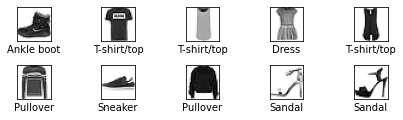

In [13]:
# Realizando o pre-processamento das imagens 
# Inspecionando a primeira imagem do conjunto de treinamento podemos perceber que os valores
# de pixels caem na faixa de 0 a 255, antes de alimentar a rede neural iremos realizar o
# pre-processamento dividindo os valores por 255.
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

# E importante que tanto os dados de treinamento quanto os de testes sejam realizados da mesma forma.
train_images = train_images / 255   
test_imagens = test_images / 255

# Exibindo as primeiras 10 imagens do conjunto de treinamento com seus respectivos rótulos.
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    plt.tight_layout()


##### Construção do Modelo

In [14]:
# Iniciando a construção do modelo com duas camadas totalmente conectadas, a primeira recebendo 128 neurônios
# para a segunda camada fornecendo a saída com 10 neurônios.
model = Sequential()
# Nivela a enrada das dados. 
model.add(tf.keras.layers.Flatten(input_shape = (28, 28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'sigmoid'))

# Definindo o Otimizador e compilando o modelo proposto.
otimizador = tf.keras.optimizers.Adam(learning_rate = 0.01)
model.compile(optimizer = otimizador, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Alimentando a rede com os dados de treinamento fazendo com que o modelo aprenda a associar
# os rótulos as imagens, logo após pedindo ao modelo para que faça predições sobre um conjunto de teste
# Na Alimentação da rede o mesmo implementa o algoritmo de backpropagation.
model.fit(train_images, train_labels, epochs = 10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 21us/sample - loss: 2.3039 - accuracy: 0.1020
Epoch 2/10
60000/60000 [==============================] - 1s 22us/sample - loss: 2.3039 - accuracy: 0.1002
Epoch 3/10
60000/60000 [==============================] - 1s 21us/sample - loss: 2.3040 - accuracy: 0.1025
Epoch 4/10
60000/60000 [==============================] - 1s 22us/sample - loss: 2.3039 - accuracy: 0.0996
Epoch 5/10
60000/60000 [==============================] - 1s 21us/sample - loss: 2.3039 - accuracy: 0.0972
Epoch 6/10
60000/60000 [==============================] - 1s 19us/sample - loss: 2.3040 - accuracy: 0.0997
Epoch 7/10
60000/60000 [==============================] - 1s 18us/sample - loss: 2.3039 - accuracy: 0.0998
Epoch 8/10
60000/60000 [==============================] - 1s 19us/sample - loss: 2.3040 - accuracy: 0.1003
Epoch 9/10
60000/60000 [==============================] - 1s 19us/sample - loss: 2.3041 - accuracy: 0.1008
Epoch 10/10
60

##### Avaliando a precisão comparando o desempenho do modelo em conjunto com os dados de teste

In [15]:
# Mostra a porcentagem de precisão do modelo alimentado pelo conjunto de testes
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('precisão dos testes: ', test_acc, '%')

precisão dos testes:  0.3036 %


C:\Users\Silas João\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


##### Realizando Predições 

In [16]:
# Realizando a predição 
predictions = model.predict(test_images)
# A predição e uma matriz de 10 números que descrevem a confiança do modelo.
# Predição da primeira imagem.
predictions[0]

# Verificando qual etiqueta tem o valor de confiança mais alto.
print('Seleção da imagem pelo modelo: ',np.argmax(predictions[0]))
# Veficando o rótulo da mesma se coincide com o obtido na imagem da predição.
print('Rótulo da imagem verdadeira: ',test_labels[0])

# Caso ambos sejam convergentes vemos que a rede conseguiu realizar a predição sobre os dados de teste, porém caso
# Os valores sejam divergentes a mesma ainda precisa ser ajustada. :(


Seleção da imagem pelo modelo:  2
Rótulo da imagem verdadeira:  9


### Aplicações de Regressão Linear

A regressão linear é um dos algoritmos de aprendizado de máquina fundamentais utilizada para estimar a condicional de uma variável y, dados os valores de algumas outras variáveis x. A regressão, em geral, tem como objectivo tratar de um valor que não se consegue estimar inicialmente. Neste exemplo iremos utilizar o mesmo príncipio resolvendo um problema simples e clássico estimando o a inclinação da reta para se adaptar aos dados proprostos.

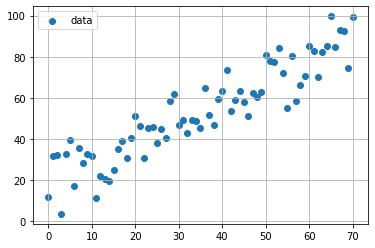

In [86]:
data = np.linspace(0, 70, 71)
random_data = data + 35 * np.random.random((len(data)))  # Gerando dados aleatórios. Ruídos sobre os dados

# Apresentação dos dados de amostragem
plt.scatter(data, random_data, label = 'data')
plt.legend()
plt.grid()

In [90]:
# Iremos modelar a reta y = m * x + b com apenas um único neurônio.
model = Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=[1]))
model.compile(loss = 'mean_squared_error', optimizer = tf.keras.optimizers.Adam(0.1))

history = model.fit(data, random_data, epochs = 200)

Train on 71 samples
Epoch 1/200
71/71 [==============================] - 0s 3ms/sample - loss: 6980.6628
Epoch 2/200
71/71 [==============================] - 0s 42us/sample - loss: 5122.9735
Epoch 3/200
71/71 [==============================] - 0s 28us/sample - loss: 3590.3435
Epoch 4/200
71/71 [==============================] - 0s 28us/sample - loss: 2322.7341
Epoch 5/200
71/71 [==============================] - 0s 28us/sample - loss: 1413.9984
Epoch 6/200
71/71 [==============================] - 0s 28us/sample - loss: 741.4671
Epoch 7/200
71/71 [==============================] - 0s 28us/sample - loss: 383.7790
Epoch 8/200
71/71 [==============================] - 0s 42us/sample - loss: 200.7297
Epoch 9/200
71/71 [==============================] - 0s 28us/sample - loss: 145.6409
Epoch 10/200
71/71 [==============================] - 0s 42us/sample - loss: 170.3605
Epoch 11/200
71/71 [==============================] - 0s 42us/sample - loss: 216.3147
Epoch 12/200
71/71 [===================

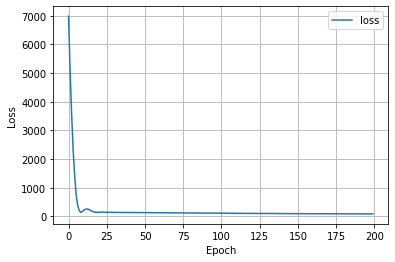

In [93]:
# Perdas durante o treinamento
plt.plot(history.history['loss'], label = 'loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()

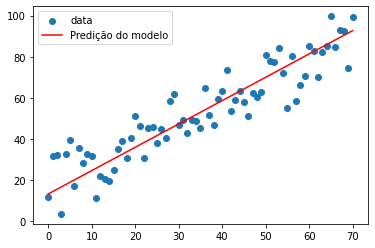

In [95]:
# Realizando a predição do modelo
predicao = model.predict(data)

plt.scatter(data, random_data, label = 'data')
plt.plot(data, predicao, label = 'Predição do modelo', color = 'r')
plt.legend()


## Referências
[1] Neural networks and learning machines, Simon Haykin.—3rd ed.\ [2] Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow by Aurélien Géron Copyright © 2019 Kiwisoft S.A.S. All rights reserved.